In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings('ignore')

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
path = "/content/drive/MyDrive/CSE424 [20101367]/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(path)

In [125]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : (5110, 12)

Glimpse Of The Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [126]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [127]:
print(f"Summary Of The Dataset :")
data.describe()

Summary Of The Dataset :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [128]:
data.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [129]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 5110 entries in this dataset.
After removing duplicate entries there are 5110 entries in this dataset.


In [130]:
print(f"Null values of the Dataset :")
data.isnull().sum()

Null values of the Dataset :


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [131]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isnull().sum()

After dropping null values, the shape of the Dataset is (4909, 12)
After dropping null values, null values of the Dataset :


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [132]:
data["age"] = data["age"].astype("int")
data = data[data["gender"] != "Other"]
data["hypertension"].replace({0:"No", 1:"Yes"}, inplace = True)
data["heart_disease"].replace({0:"No", 1:"Yes"}, inplace = True)
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)
data["ever_married"].replace({"No":"Unmarried", "Yes":"Married"}, inplace = True)
data["work_type"].replace({"Self-employed":"Self Employed","children":"Children", "Govt_job":"Government Job", "Private":"Private Job", "Never_worked":"Unemployed"}, inplace = True)
data["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
data.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)
data = data[["Age","Gender","Marital Status","BMI","Occupation Type","Residence Type","Smoking Status","Hypertension","Heart Disease","Average Glucose Level","Stroke"]]

print("After preprocessing, the final dataset :")
data.head()

After preprocessing, the final dataset :


,Age,Gender,Marital Status,BMI,Occupation Type,Residence Type,Smoking Status,Hypertension,Heart Disease,Average Glucose Level,Stroke
0,67,Male,Married,36.6,Private Job,Urban,Formerly Smoked,No,Yes,228.69,Yes
2,80,Male,Married,32.5,Private Job,Rural,Never Smoked,No,Yes,105.92,Yes
3,49,Female,Married,34.4,Private Job,Urban,Smokes,No,No,171.23,Yes
4,79,Female,Married,24.0,Self Employed,Rural,Never Smoked,Yes,No,174.12,Yes
5,81,Male,Married,29.0,Private Job,Urban,Formerly Smoked,No,No,186.21,Yes


In [133]:
print(f"After preprocessing, the summary of the dataset :")
data.describe()

After preprocessing, the summary of the dataset :


,Age,BMI,Average Glucose Level
count,4908.000000,4908.00000,4908.000000
mean,42.857579,28.89456,105.297402
std,22.577004,7.85432,44.425550
min,0.000000,10.30000,55.120000
25%,25.000000,23.50000,77.067500
50%,44.000000,28.10000,91.680000
75%,60.000000,33.10000,113.495000
max,82.000000,97.60000,271.740000


In [134]:
data.describe(include=object)

,Gender,Marital Status,Occupation Type,Residence Type,Smoking Status,Hypertension,Heart Disease,Stroke
count,4908,4908,4908,4908,4908,4908,4908,4908
unique,2,2,5,2,4,2,2,2
top,Female,Married,Private Job,Urban,Never Smoked,No,No,No
freq,2897,3204,2810,2490,1852,4457,4665,4699


In [135]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)
palette = ["#3D5656","#285430","#5F8D4E","#A4BE7B","#E5D9B6"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

Let's have a look on the distribution of stroke patient's age :


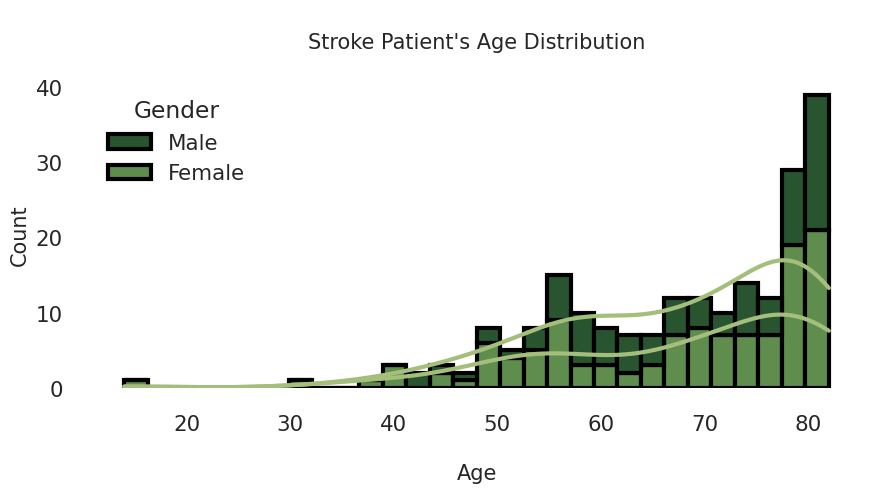

In [136]:
print(f"Let's have a look on the distribution of stroke patient's age :")
plt.subplots(figsize=(10, 4))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="Age",hue="Gender",multiple="stack",palette=palette[1:3],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[3])
p.axes.lines[1].set_color(palette[3])
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=15)
p.set_ylabel("Count",fontsize=15)
p.set_xlabel("\nAge",fontsize=15)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the ratio of stroke patient's gender :


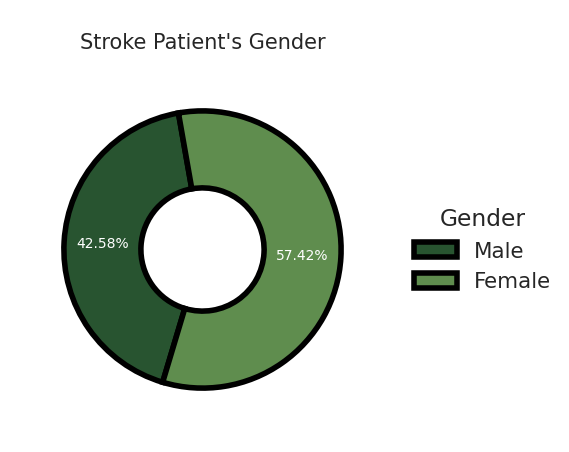

In [137]:
print(f"Let's have a look on the ratio of stroke patient's gender :")
plt.subplots(figsize=(5, 5))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[0],
                                    data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[1:3],
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Gender",fontsize=15)
plt.show()

Let's have a look on the ratio of stroke patient's smoking status :


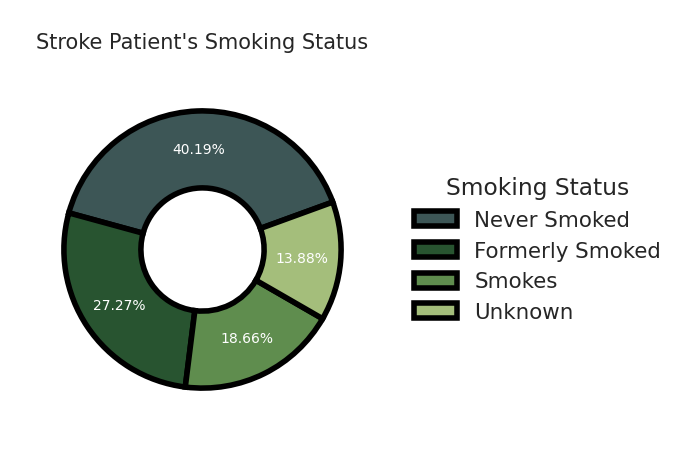

In [138]:
print(f"Let's have a look on the ratio of stroke patient's smoking status :")
plt.subplots(figsize=(5, 5))

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[1],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[2],
                                    data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[0:4],
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Smoking Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Smoking Status",fontsize=15)
plt.show()

Let's have a look on the ratio of stroke patient's marital status :


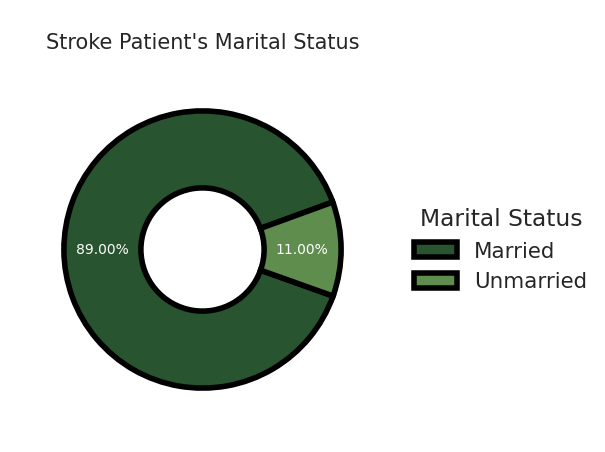

In [139]:
print(f"Let's have a look on the ratio of stroke patient's marital status :")
plt.subplots(figsize=(5, 5))

labels = "Married","Unmarried"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[1:3],
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Marital Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Marital Status",fontsize=15)
plt.show()

Let's have a look on the distribution of stroke patient's BMI :


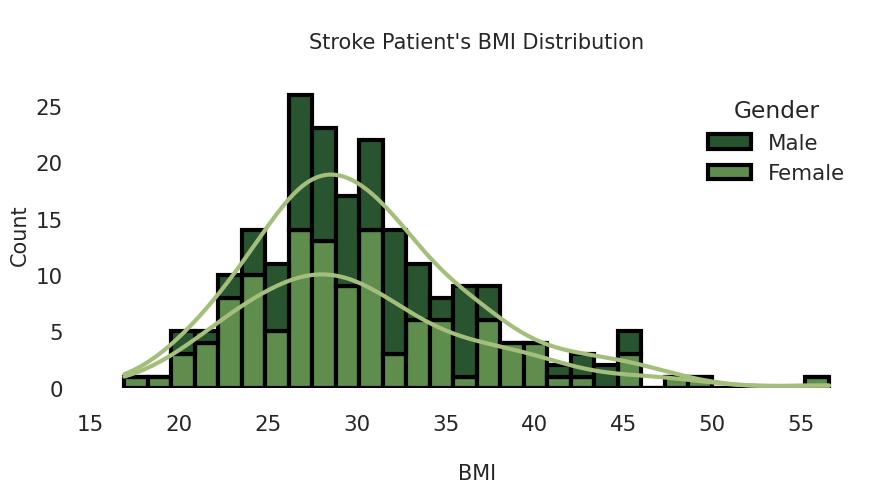

In [140]:
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(10, 4))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="BMI",hue="Gender",multiple="stack",palette=palette[1:3],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[3])
p.axes.lines[1].set_color(palette[3])
p.axes.set_title("\nStroke Patient's BMI Distribution\n",fontsize=15)
p.set_ylabel("Count",fontsize=15)
p.set_xlabel("\nBMI",fontsize=15)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the ratio of stroke patient's heart disease :


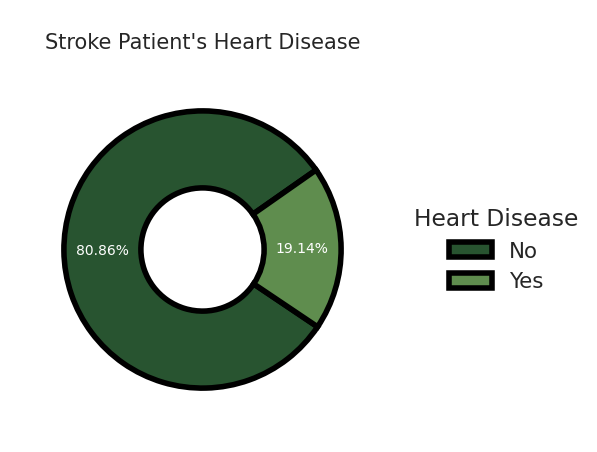

In [141]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(5, 5))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[1:3],
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 35)

plt.legend(wedges, labels, title="Heart Disease",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Heart Disease",fontsize=15)
plt.show()

Let's have a look on the ratio of stroke patient's heart disease :


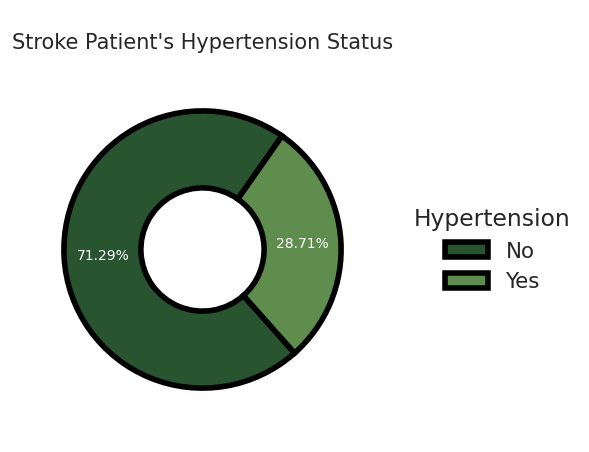

In [142]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(5, 5))

labels = "No","Yes"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[1:3],
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 55)

plt.legend(wedges, labels, title="Hypertension",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Hypertension Status",fontsize=15)
plt.show()

Let's have a look on the distribution of stroke patient's average glucose level :


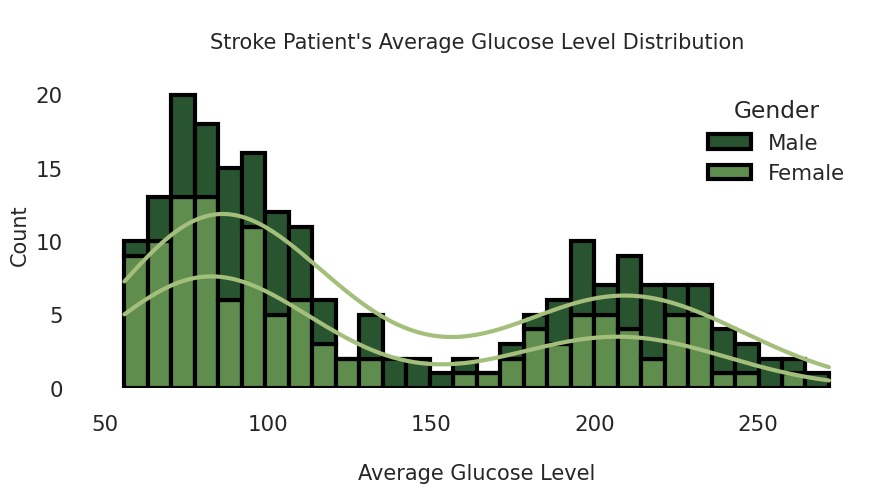

In [143]:
print(f"Let's have a look on the distribution of stroke patient's average glucose level :")
plt.subplots(figsize=(10, 4))
p = sns.histplot(data=data[data["Stroke"]=="Yes"],x="Average Glucose Level",hue="Gender",multiple="stack",palette=palette[1:3],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[3])
p.axes.lines[1].set_color(palette[3])
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n",fontsize=15)
p.set_ylabel("Count",fontsize=15)
p.set_xlabel("\nAverage Glucose Level",fontsize=15)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the ratio of stroke patient's occupation type :


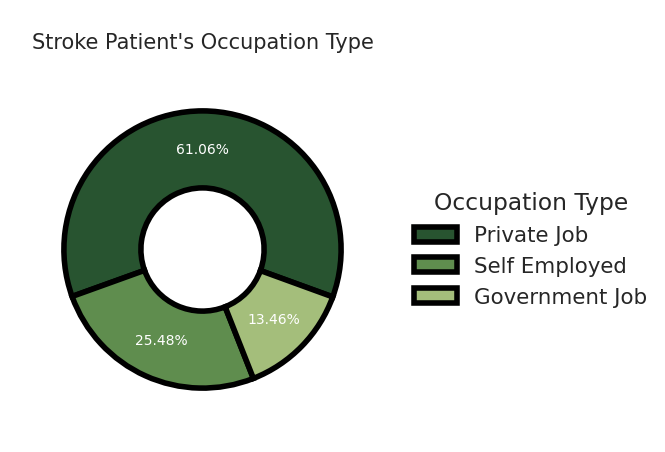

In [144]:
print(f"Let's have a look on the ratio of stroke patient's occupation type :")
plt.subplots(figsize=(5, 5))

labels = "Private Job","Self Employed","Government Job"
size = 0.5

wedges, texts, autotexts = plt.pie([data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[0],
                                    data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[1],
                                    data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[1:4],
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = -20)

plt.legend(wedges, labels, title="Occupation Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type",fontsize=15)
plt.show()

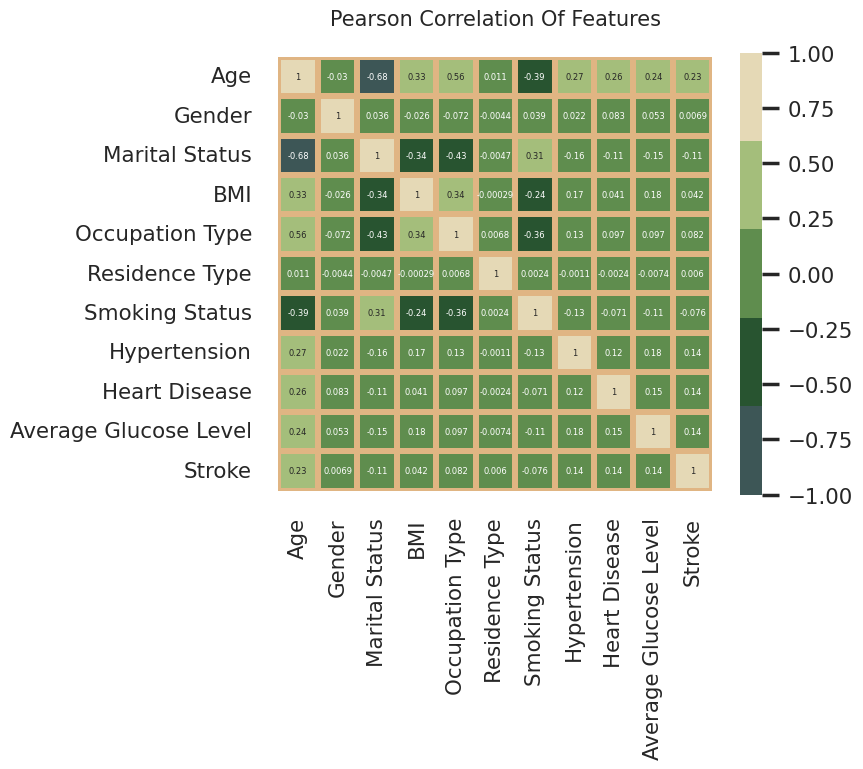

In [145]:
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(7, 7))

sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =6))
plt.title("Pearson Correlation Of Features\n", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [146]:
x = data.drop(["Stroke"],axis =1)
y = data["Stroke"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (3926, 10), (3926,)
Shape of testing data : (982, 10), (982,)


In [147]:
from mlxtend.plotting import plot_confusion_matrix

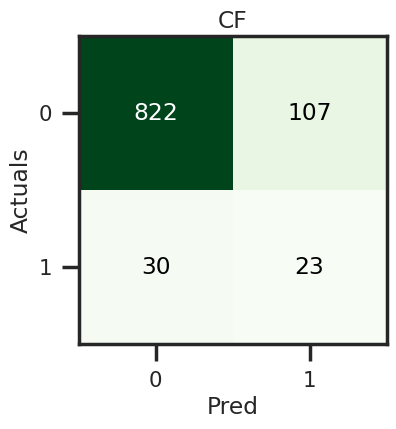

Confusion Matrix : 

[[822 107]
 [ 30  23]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       929
           1       0.18      0.43      0.25        53

    accuracy                           0.86       982
   macro avg       0.57      0.66      0.59       982
weighted avg       0.92      0.86      0.89       982


The Accuracy of Gaussian Naive Bayes is 86.05 %


In [148]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
a,b = plot_confusion_matrix(conf_mat = gnb_conf,figsize=(4, 4),cmap = 'Greens' )
plt.xlabel('Pred')
plt.ylabel('Actuals')
plt.title('CF')
plt.show()
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

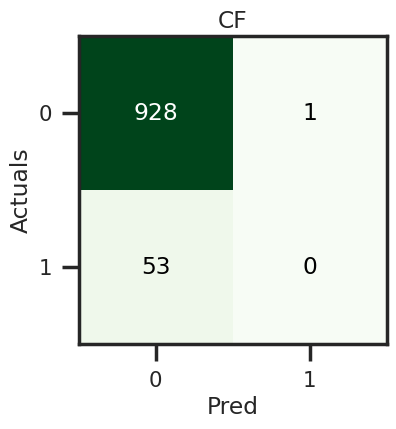

Confusion Matrix : 

[[928   1]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of K Nearest Neighbors Classifier is 94.5 %


In [149]:
#K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
a,b = plot_confusion_matrix(conf_mat = knn_conf,figsize=(4, 4),cmap = 'Greens' )
plt.xlabel('Pred')
plt.ylabel('Actuals')
plt.title('CF')
plt.show()
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

In [150]:
#Support Vector Machine
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[929   0]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of Support Vector Machine is 94.6 %


In [151]:
#Random Forest
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[929   0]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of Random Forest Classifier is 94.6 %


In [152]:
#Adaboost Classifier
adb = AdaBoostClassifier(n_estimators=100, random_state=0)
adb.fit(x_train, y_train)
adb_pred = adb.predict(x_test)
adb_conf = confusion_matrix(y_test, adb_pred)
adb_report = classification_report(y_test, adb_pred)
adb_acc = round(accuracy_score(y_test, adb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{adb_conf}")
print(f"\nClassification Report : \n\n{adb_report}")
print(f"\nThe Accuracy of AdaBoost Classifier is {adb_acc} %")

Confusion Matrix : 

[[927   2]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982


The Accuracy of AdaBoost Classifier is 94.4 %
